 # Autos auf E-Bay 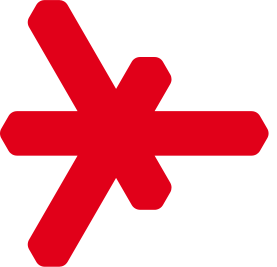
Dieses Notebook stellt einen Datensatz von Gebrauchtwagen auf E-Bay vor, den wir als Beispiel in der Vorlesung verwenden werden. Unser Endziel wird es sein, den Verkaufspreis eines Autos (gegeben Merkmale wie sein Alter, seine Marke, etc.) vorherzusagen.

Hierzu analysieren wir in diesem Notebook zunächst den Datensatz. Laden Sie die Datei 'cars.csv' aus Stud.IP herunter, plazieren Sie sie im gleichen Ordner wie das Notebook, und führen Sie die folgende Zelle aus. Es sollten Zeilen mit Merkmalen (0-56) ausgegeben werden.



In [1]:
import pandas
import numpy as np

# Anmerkung: Man kann die Datei auch in Excel/Libreoffice öffnen.
cars = pandas.read_csv('data/cars.csv')

# Wir geben die Namen der Spalten/Merkmale aus.
columns = cars.columns
for i,col in enumerate(columns):
    print('%.2d : %s' %(i,col))
    
# Wir konvertieren die Daten in ein Numpy-Array.
data = cars.values.astype('float')

00 : dollar_price
01 : registration_year
02 : power_ps
03 : kilometer
04 : postal_code
05 : type__bus
06 : type__cabrio
07 : type__coupe
08 : type__kleinwagen
09 : type__kombi
10 : type__limousine
11 : type__suv
12 : gearbox__automatik
13 : gearbox__manuell
14 : fuel__benzin
15 : fuel__diesel
16 : brand__alfa_romeo
17 : brand__audi
18 : brand__bmw
19 : brand__chevrolet
20 : brand__chrysler
21 : brand__citroen
22 : brand__dacia
23 : brand__daewoo
24 : brand__daihatsu
25 : brand__fiat
26 : brand__ford
27 : brand__honda
28 : brand__hyundai
29 : brand__jaguar
30 : brand__jeep
31 : brand__kia
32 : brand__lada
33 : brand__lancia
34 : brand__land_rover
35 : brand__mazda
36 : brand__mercedes_benz
37 : brand__mini
38 : brand__mitsubishi
39 : brand__nissan
40 : brand__opel
41 : brand__peugeot
42 : brand__porsche
43 : brand__renault
44 : brand__rover
45 : brand__saab
46 : brand__seat
47 : brand__skoda
48 : brand__smart
49 : brand__subaru
50 : brand__suzuki
51 : brand__toyota
52 : brand__trabant
5

In 'data' befindet sich nun eine Datenmatrix. Jede Zeile entspricht einem Auto, jede Spalte einem Merkmal. Berechnen Sie den Durchschnittspreis aller Autos und den Median des Preises. Welcher der beiden Werte ist erwartungsgemäß höher?

In [2]:
prices = data[:,0]
print("Durchschnittspreis: ",  np.mean(prices))
print("Median: ", np.median(prices))
print("Erwartungsgemäß ist der Mean höher, da sensibler auf Ausreißer reagiert")

Durchschnittspreis:  7360.116331909479
Median:  3999.0
Erwartungsgemäß ist der Mean höher, da sensibler auf Ausreißer reagiert


Die folgende Zelle plottet ein Histogramm aller 'prices'. Führen Sie die Zelle aus. Speichern Sie zu Beginn in 'prices' sämtliche Preise.

Es sollte ein Histogramm-Plot erscheinen, der allerdings nur aus einem Balken besteht. Was ist das Problem?

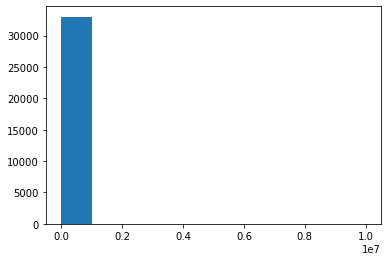

Standardunterteilung ist nicht wircklich aussagekräftig
Maximal Preis ist sehr hoch:  9999999.0


In [6]:
# display histogram of prices
import matplotlib.pyplot as plt
plt.hist(prices)
plt.show()

print("Standardunterteilung ist nicht wircklich aussagekräftig")
print("Maximal Preis ist sehr hoch: ", np.max(prices))

Die Methode hist() besitzt einen Parameter 'bins'. Hier kann man eine Liste von Grenzen zwischen den einzelnen Partitionen/bins des Histograms angeben. Versuchen Sie sinnvolle Bins zu übergeben, so dass das Histogramm aussagekräftiger wird.

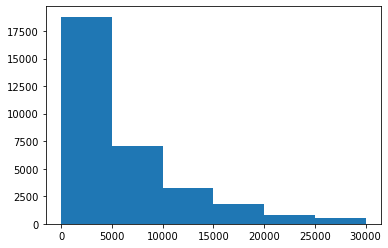

In [7]:
plt.hist(prices, bins=[0, 5000, 10000, 15000, 20000, 25000, 30000])
plt.show()

'data' enthält einige 'brand'-Spalten ('brand_audi', 'brand_bmw', ...) die angeben ob das jeweilige Auto zu einer bestimmten Marke gehört. Entfernen Sie diese Spalten aus dem Datensatz.

*Hinweis: Mit np.hstack() können Sie zwei Matrizen nebeneinaneder 'kleben'.*

In [12]:
# brans from column 16 to 54
# the to parameter is exclusive 
data_split_1 = data[:,:16]
data_split_2 = data[:,-2:] 

result = np.hstack([data_split_1, data_split_2])
result.shape

(33009, 18)

Geben Sie das günstigste Auto aus. Warum ist es so günstig? Hat es einen Schaden?

In [13]:
# Mimaler Wert
print("günstigstes Auto: ", np.min(prices))

# Stelle des minmalen Wertes
print("index: ", np.argmin(prices))

günstigstes Auto:  110.0
index:  14412


In [18]:
# Zeile mit den Werten für den Index 14412
np.set_printoptions(suppress=True)
mincar = data[14412]

# print feature and value
for feat, value in zip(columns, mincar):
    print(feat, ": ", value)

dollar_price :  110.0
registration_year :  1996.0
power_ps :  100.0
kilometer :  150000.0
postal_code :  71063.0
type__bus :  0.0
type__cabrio :  0.0
type__coupe :  0.0
type__kleinwagen :  0.0
type__kombi :  1.0
type__limousine :  0.0
type__suv :  0.0
gearbox__automatik :  0.0
gearbox__manuell :  1.0
fuel__benzin :  1.0
fuel__diesel :  0.0
brand__alfa_romeo :  0.0
brand__audi :  0.0
brand__bmw :  0.0
brand__chevrolet :  0.0
brand__chrysler :  0.0
brand__citroen :  0.0
brand__dacia :  0.0
brand__daewoo :  0.0
brand__daihatsu :  0.0
brand__fiat :  0.0
brand__ford :  0.0
brand__honda :  0.0
brand__hyundai :  0.0
brand__jaguar :  0.0
brand__jeep :  0.0
brand__kia :  0.0
brand__lada :  0.0
brand__lancia :  0.0
brand__land_rover :  0.0
brand__mazda :  0.0
brand__mercedes_benz :  0.0
brand__mini :  0.0
brand__mitsubishi :  0.0
brand__nissan :  0.0
brand__opel :  1.0
brand__peugeot :  0.0
brand__porsche :  0.0
brand__renault :  0.0
brand__rover :  0.0
brand__saab :  0.0
brand__seat :  0.0
bran

Auto hat keinen Schaden, jedoch ist es alt und hat schon über 150000 km gelaufen, zudem ist es ein Opel

Führen Sie eine kleine Datenprüfung durch: Stellen Sie sicher, dass jedes Auto entweder beschädigt oder nicht beschädigt ist (d.h., die letzten zwei Spalten des Datensatzes sind korrekt). Checken Sie, dass das Minimum der letzten und vorletzten Spalte immer =0 ist, und das Maximum immer =1.

*Hinweis: Mit np.all() können Sie prüfen ob eine Bedingug für **alle** Einträge eines Arrays gilt.*

In [25]:
damage_ja = data[:,-2]
damage_nein = data[:,-1]

# Es gilt immer: Die damage_ja-Spalte ist 0 oder 1
np.all(np.logical_or(damage_ja == 0, damage_ja == 1))

# Es gilt immer: die damage_nein-Splate ist das Gegenteil von damage_ja
np.all(damage_nein == 1 - damage_ja)

True

Um einen Eindruck von der Beziehung zwischen Preis und Kilometerstand zu erhalten, plotten wir eine kleine Punktwolke. In dieser ist der Preis die x-Achse, der Kilometerstand die y-Achse, und jedes Auto ist ein Punkt.

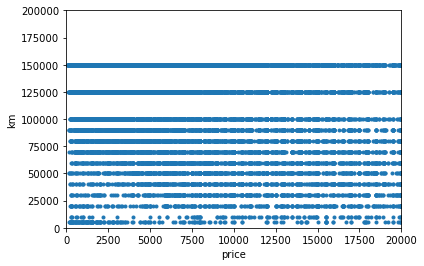

In [53]:
prices = data[:,0]
km = data[:,3]

# plot km against price
plt.plot(prices, km, 'o', markersize=3)
plt.xlim([0,20000])
plt.ylim([0,200000])
plt.xlabel('price')
plt.ylabel('km')
plt.show()